In [12]:
from itertools import cycle
import numpy as np
import pandas as pd
import scipy
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth, SpectralClustering, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white')

## Guided Section

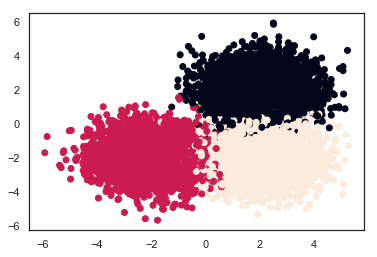

In [4]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [6]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


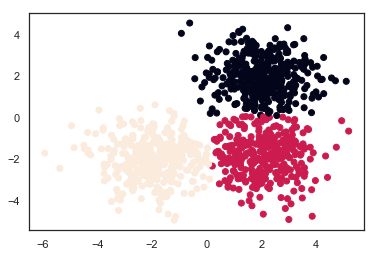

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [7]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

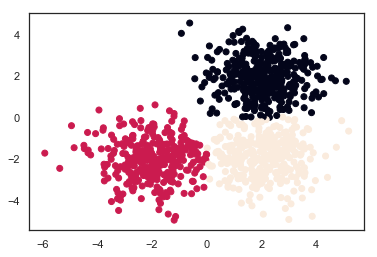

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      357    0    5
1        1  310    9
2        7    5  306


In [9]:
# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [11]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 93


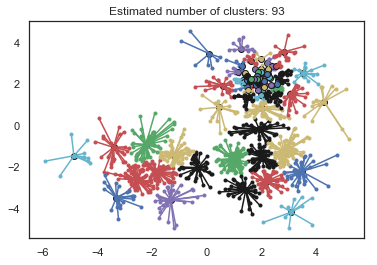

In [13]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## Drill: Blob Iteration 1 - Closer Blobs

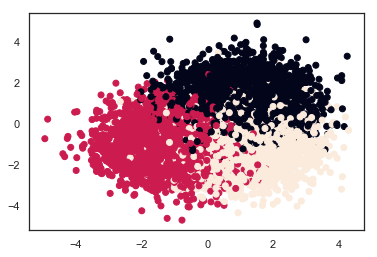

In [14]:
# The coordinates of the centers of our blobs.
centers = [[1, 1], [-1, -1], [1, -1]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### Mean Shift

Number of estimated clusters: 3
The estimated bandwidth: 0.9946165728075853


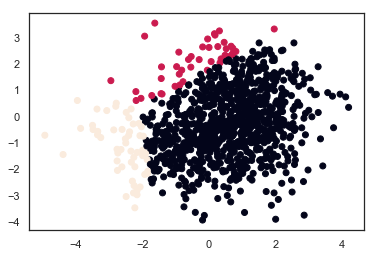

Comparing the assigned categories to the ones in the data:
col_0    0   1   2
row_0             
0      329  33   0
1      260   8  52
2      315   2   1


In [23]:
bandwidth = estimate_bandwidth(X_train, quantile=0.1, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_train)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
print('The estimated bandwidth: {}'.format(bandwidth))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

In order to break out the three clusters I had to drop the quantile in the bandwidth estimator to 0.1, which makes sense given how close the data is to one another. It needs a lower bandwidth in order to identify the closer together blobs.

### Spectral

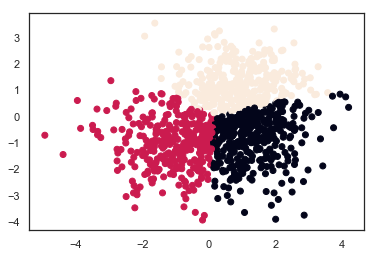

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       82   15  265
1       45  263   12
2      238   49   31


In [39]:
n_clusters=3

sc = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_neighbors=100)
sc.fit(X_train)

predict=sc.fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Spectral clustering is not doing a great job of estimating the blobs that are closer together. Changing the affinity to nearest_neighbors did help in some iterations, but it was very unstable and led to very discreet boundary lines. These type of kernel estimates (rbf, and nearest_neighbors) aren't great solutions for dense and overlapping data. It could lead the data scientist to believe there are abrupt boundaries between subgroups in the data that aren't actually there.

### Affinity Propagation

Done
Estimated number of clusters: 3


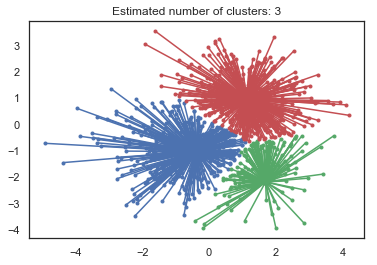

In [49]:
af = AffinityPropagation(damping=0.985).fit(X_train)
print('Done')

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

Through some tuning of the damping parameter I was able to get the number of clusters down from 36 to 3. Even though there are only three blobs, this is another algorithm that does not handle overlap very well. Most of the clustering algorithms are looking for discreet boundaries between clusters.

### What did I learn?

For clusters of data that are close together, it is very hard for these approaches to breakout the groups appropriately. They also do not handle overlap in clusters very well. This makes sense because the idea of clustering is to subgroup the data based on quantifiable separations in the data. if there is a large portion of the clusters that overlaps then the algorithm will not be able to classify it appropriately.

This shines a pretty bright light on why it is necessary to understand the data on a deeper level before applying unsupervised clustering techniques. If you know there is a grey area between groups ahead of time then it will be tough to break them out.

## Drill: Blob Iteration 2 - More Blobs

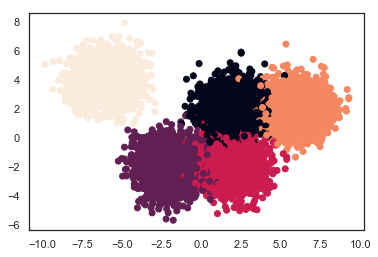

In [51]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [6, 2], [-6, 4]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### Mean Shift

Number of estimated clusters: 5
The estimated bandwidth: 2.121786595467091


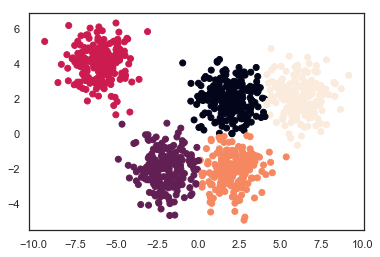

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0      215    0    0    2    4
1        1  198    0    4    0
2        3    7    0  181    0
3        4    0    0    0  183
4        0    0  198    0    0


In [55]:
bandwidth = estimate_bandwidth(X_train, quantile=0.15, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_train)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
print('The estimated bandwidth: {}'.format(bandwidth))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

With highly separated data it is much easier to break out the groups, regardless of how many there are. Tuning the bandwidth is very important when the groups are not equally spaced.

### Spectral

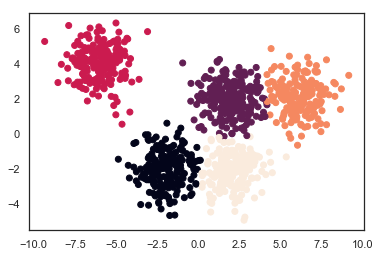

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0  217    0    3    1
1      197    1    1    0    4
2        8    4    0    0  179
3        0    5    0  182    0
4        0    0  198    0    0


In [56]:
n_clusters=5

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

predict=sc.fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Similar results here where there are some edge cases that get misclassified, but overall the algorithm does a good job at breaking out the clusters. Interestingly, it does a good job of separating them, but it isn't classifying the same cluster to the same cluster from the original plot. Put simply, the original orange cluster is not always the orange cluster. 

### Affinity Propagation

Done
Estimated number of clusters: 6


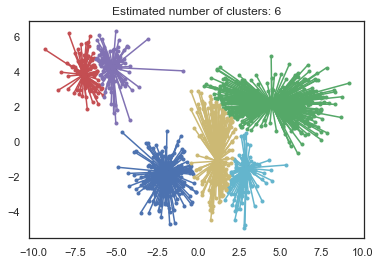

In [62]:
af = AffinityPropagation(damping=0.983).fit(X_train)
print('Done')

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

The clusters here look different than the original blobs, but again, tuning the damping value allowed the model to come down from 23 clusters to 6. This is necessary due to the fact that there are so few clusters in the data to begin with.

### What did I learn?

In this case I learned that the mean shift bendwidth parameter needs to be set lower for datasets where clusters are not evenly spaced apart (but not as low as when there is a lot of overlap). Spectral clustering does a very good job regardless of the number of clusters in the dataset. Affinity still had trouble with this, but likely because there are so few initial clusters. This could be used to find subsets of previously defined clusters or additional groups within the data that could be beneficial for the business case.

## Drill: Blob Iteration 3 - More Closer Blobs

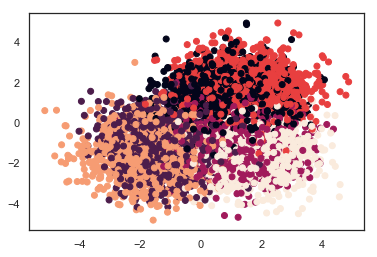

In [64]:
# The coordinates of the centers of our blobs.
centers = [[1, 1], [-1, -1], [1, -1], [1.5, 1.5], [-1.5, -1.5], [1.5, -1.5]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### Mean Shift

Number of estimated clusters: 6


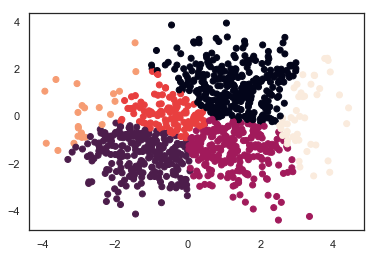

Comparing the assigned categories to the ones in the data:
col_0    0    1    2   3   4   5
row_0                           
0      138    0    9  22   1   6
1        2  113   22  42   7   0
2       20   14   95  12   1   9
3      145    0    3   4   2  15
4        2  118    5  28  12   0
5       12    8  109   5   0  19


In [69]:
bandwidth = estimate_bandwidth(X_train, quantile=0.07, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_train)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Tuning the bandwidth helps to breakout the data into the correct amount of clusters, but the precision is very low for each cluster. Again, the proximity of the clusters is definitely the issue here. 

### Spectral

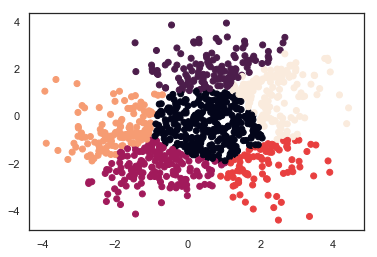

Comparing the assigned categories to the ones in the data:
col_0   0   1   2   3   4   5
row_0                        
0      61  68   0   0   3  44
1      56   1  63   2  64   0
2      81   1  18  29   4  18
3      30  63   0   1   1  74
4      29   0  72   0  64   0
5      62   0  15  57   1  18


In [80]:
n_clusters=6

sc = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_neighbors=500)
sc.fit(X_train)

predict=sc.fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Here the proximity of the clusters is hard to breakout with the algorithm. Precision is very low here...

### Affinity Propagation

Done
Estimated number of clusters: 35


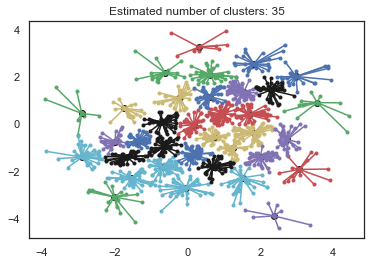

In [81]:
af = AffinityPropagation().fit(X_train)
print('Done')

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

What's interesting with affinity propagation is that the clusters that break out do not have to be in close proximity to one another. This could be useful in tandem with some of the other methods to determine if the true data clusters overlap one another. However, in a real world situation you would not know what the 'real' or 'true' cluster is. 

### What did I learn?

Here the learnings are similar from the iteration with blobls that were closer together. Increasing the number of blobs from 3 to 6 doesn't really cause any of the models trouble. I assume that increasing from 3 to 30 might be a different story, especially in regards to affinity propagation. In general, when clusters are not broken out cleanly and have overlap, all clustering algorithms used above have a tough time.